In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

In [2]:
baner = pd.read_excel('Z_Baner_cleaned.xlsx')
bavdhan = pd.read_excel('Z_Bavdhan_cleaned.xlsx')
hinjawadi = pd.read_excel('Z_Hinjawadi_cleaned.xlsx')
wakad = pd.read_excel('Z_Wakad_cleaned.xlsx')

In [3]:
baner['location'] = 'Baner'
bavdhan['location'] = 'Bavdhan'
hinjawadi['location'] = 'Hinjawadi'
wakad['location'] = 'Wakad'

In [4]:
combined = pd.concat([baner, bavdhan, hinjawadi, wakad], ignore_index=True)

In [5]:
print(f"Baner: {baner.shape}")
print(f"Bavdhan: {bavdhan.shape}")
print(f"Hinjawadi: {hinjawadi.shape}")
print(f"Wakad: {wakad.shape}")
print(f"Combined: {combined.shape}")

Baner: (1137, 7)
Bavdhan: (834, 7)
Hinjawadi: (960, 7)
Wakad: (1118, 6)
Combined: (4049, 7)


In [6]:
combined.head()

,Name,off,ratings,price_for_one,delivery_reviews,cuisine,location
0,McDonald's,₹50 OFF,4.1,₹150 for one\n30 min,"(9,810 Delivery Reviews)","Burger, Fast Food, Beverages",Baner
1,Nawab Asia,₹50 OFF,4.1,₹350 for one\n30 min,"(3,054 Delivery Reviews)","North Indian, Chinese, Mughlai, Biryani, Desse...",Baner
2,Mithas,₹50 OFF,4.3,₹100 for one\n29 min,"(2,262 Delivery Reviews)","Mithai, Street Food",Baner
3,Anna Idli,₹50 OFF,4.2,₹100 for one\n30 min,(21.8K Delivery Reviews),"South Indian, Beverages",Baner
4,Dadu's Sweet Emporio,₹50 OFF,4.3,₹150 for one\n21 min,"(4,504 Delivery Reviews)","Mithai, Street Food, Ice Cream",Baner


In [7]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4049 entries, 0 to 4048
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Name              4049 non-null   object 
 1   off               3061 non-null   object 
 2   ratings           2959 non-null   float64
 3   price_for_one     3770 non-null   object 
 4   delivery_reviews  3598 non-null   object 
 5   cuisine           2931 non-null   object 
 6   location          4049 non-null   object 
dtypes: float64(1), object(6)
memory usage: 221.6+ KB


In [8]:
combined.describe()

,ratings
count,2959.000000
mean,3.827273
std,0.311754
min,2.400000
25%,3.700000
50%,3.900000
75%,4.000000
max,4.800000


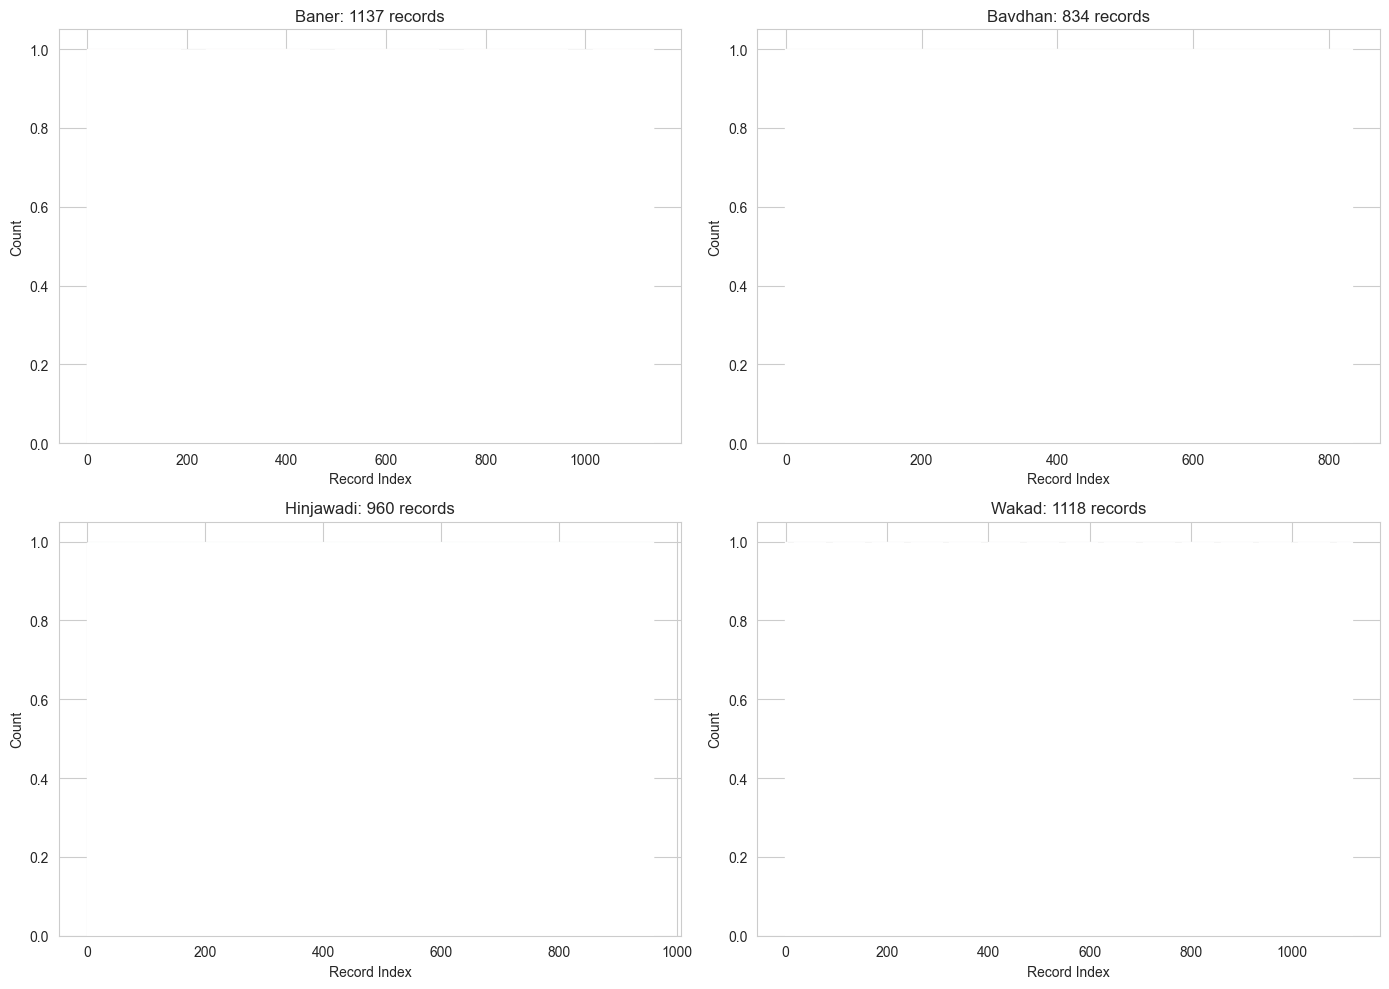

In [9]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
locations = [baner, bavdhan, hinjawadi, wakad]
names = ['Baner', 'Bavdhan', 'Hinjawadi', 'Wakad']
for i, (df, name) in enumerate(zip(locations, names)):
    ax = axes[i//2, i%2]
    ax.bar(range(len(df)), [1]*len(df), color=sns.color_palette('husl', 4)[i])
    ax.set_title(f'{name}: {len(df)} records')
    ax.set_xlabel('Record Index')
    ax.set_ylabel('Count')
plt.tight_layout()
plt.show()

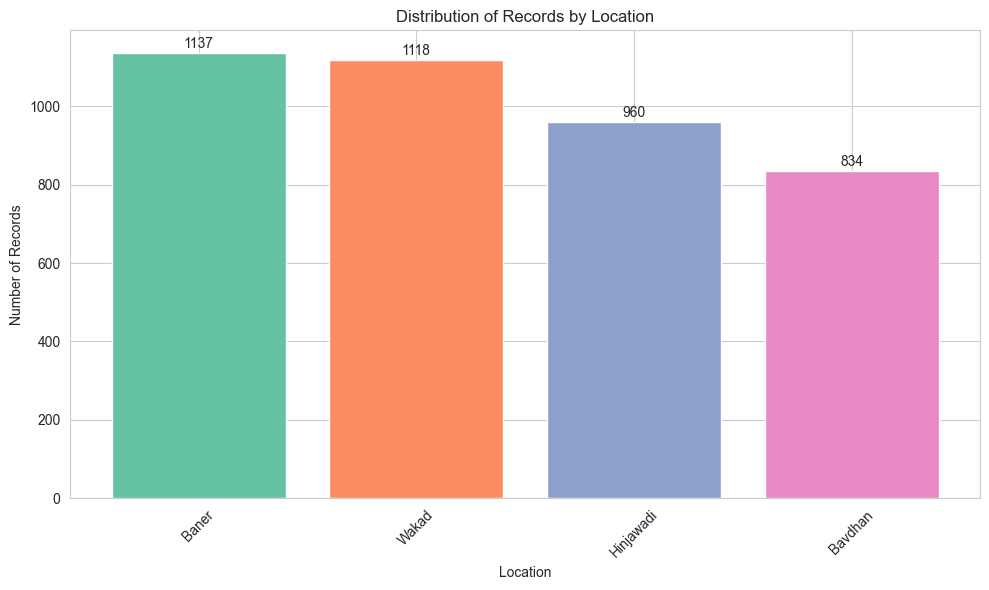

In [10]:
location_counts = combined['location'].value_counts()
plt.figure(figsize=(10, 6))
plt.bar(location_counts.index, location_counts.values, color=sns.color_palette('Set2'))
plt.title('Distribution of Records by Location')
plt.xlabel('Location')
plt.ylabel('Number of Records')
plt.xticks(rotation=45)
for i, v in enumerate(location_counts.values):
    plt.text(i, v + 5, str(v), ha='center', va='bottom')
plt.tight_layout()
plt.show()

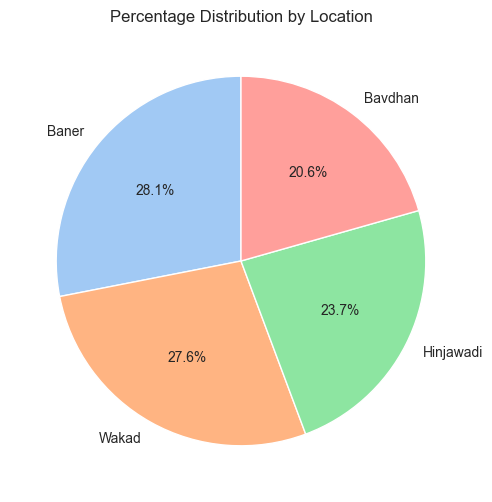

In [11]:
plt.figure(figsize=(10, 6))
plt.pie(location_counts.values, labels=location_counts.index, autopct='%1.1f%%', 
        colors=sns.color_palette('pastel'), startangle=90)
plt.title('Percentage Distribution by Location')
plt.show()

In [12]:
numeric_cols = combined.select_dtypes(include=[np.number]).columns.tolist()
if 'location' in numeric_cols:
    numeric_cols.remove('location')
print(f"Numeric columns: {numeric_cols}")

Numeric columns: ['ratings']


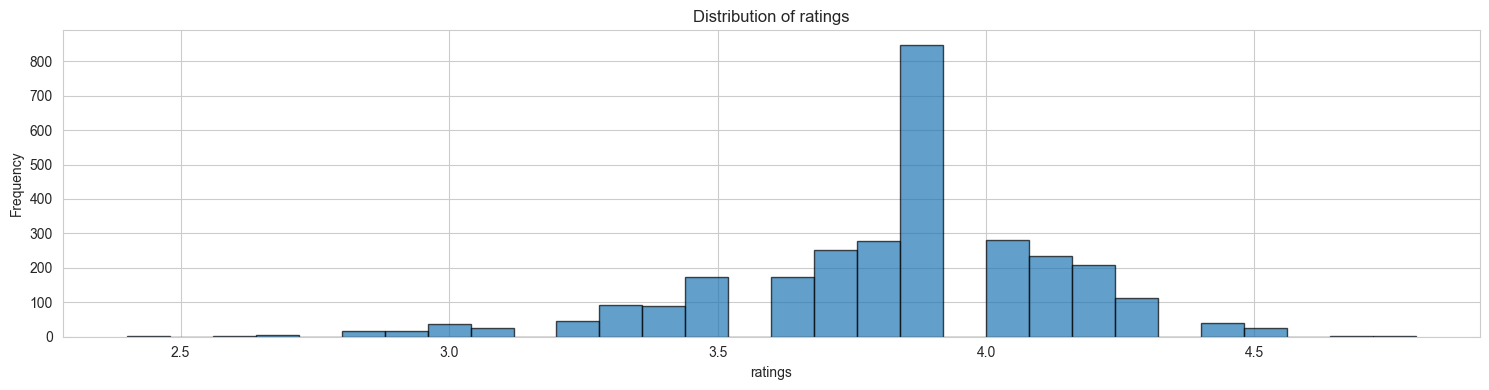

In [13]:
if len(numeric_cols) > 0:
    fig, axes = plt.subplots(1, min(len(numeric_cols), 3), figsize=(15, 4))
    if len(numeric_cols) == 1:
        axes = [axes]
    for i, col in enumerate(numeric_cols[:3]):
        axes[i].hist(combined[col].dropna(), bins=30, edgecolor='black', alpha=0.7)
        axes[i].set_title(f'Distribution of {col}')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Frequency')
    plt.tight_layout()
    plt.show()

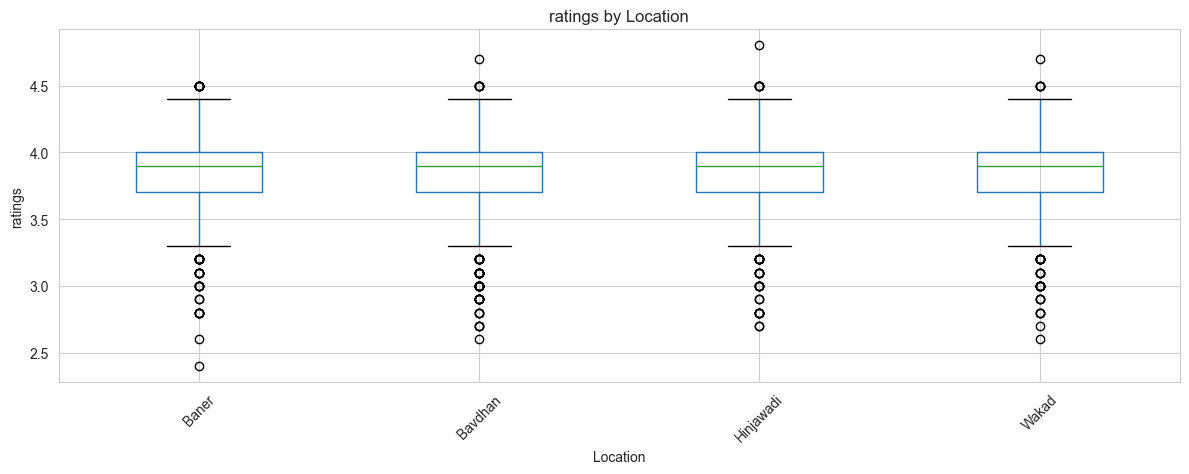

In [14]:
if len(numeric_cols) > 0:
    for col in numeric_cols[:3]:
        plt.figure(figsize=(12, 5))
        combined.boxplot(column=col, by='location', ax=plt.gca())
        plt.title(f'{col} by Location')
        plt.suptitle('')
        plt.xlabel('Location')
        plt.ylabel(col)
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

In [15]:
if len(numeric_cols) > 1:
    correlation_matrix = combined[numeric_cols].corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
                square=True, linewidths=1, cbar_kws={"shrink": 0.8})
    plt.title('Correlation Matrix')
    plt.tight_layout()
    plt.show()

In [16]:
if len(numeric_cols) >= 2:
    plt.figure(figsize=(10, 6))
    for location in combined['location'].unique():
        subset = combined[combined['location'] == location]
        plt.scatter(subset[numeric_cols[0]], subset[numeric_cols[1]], 
                   label=location, alpha=0.6, s=50)
    plt.xlabel(numeric_cols[0])
    plt.ylabel(numeric_cols[1])
    plt.title(f'{numeric_cols[0]} vs {numeric_cols[1]}')
    plt.legend()
    plt.tight_layout()
    plt.show()

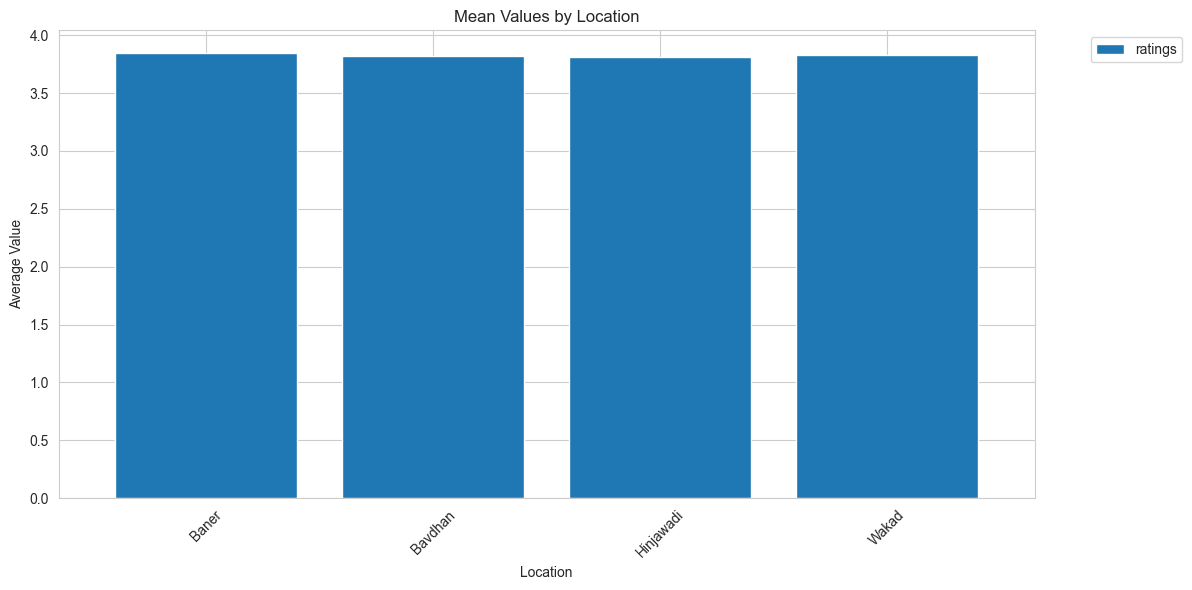

In [17]:
if len(numeric_cols) > 0:
    location_stats = combined.groupby('location')[numeric_cols].mean()
    location_stats.plot(kind='bar', figsize=(12, 6), width=0.8)
    plt.title('Mean Values by Location')
    plt.xlabel('Location')
    plt.ylabel('Average Value')
    plt.xticks(rotation=45)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

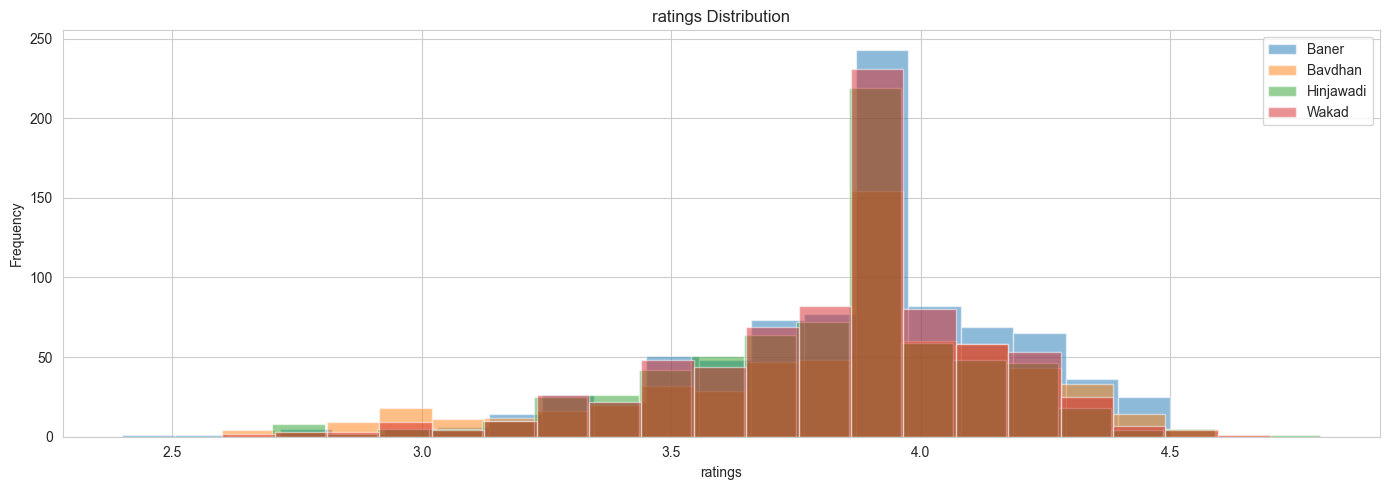

In [18]:
if len(numeric_cols) > 0:
    fig, axes = plt.subplots(1, min(len(numeric_cols), 2), figsize=(14, 5))
    if len(numeric_cols) == 1:
        axes = [axes]
    for i, col in enumerate(numeric_cols[:2]):
        for location in combined['location'].unique():
            subset = combined[combined['location'] == location]
            axes[i].hist(subset[col].dropna(), alpha=0.5, label=location, bins=20)
        axes[i].set_title(f'{col} Distribution')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Frequency')
        axes[i].legend()
    plt.tight_layout()
    plt.show()

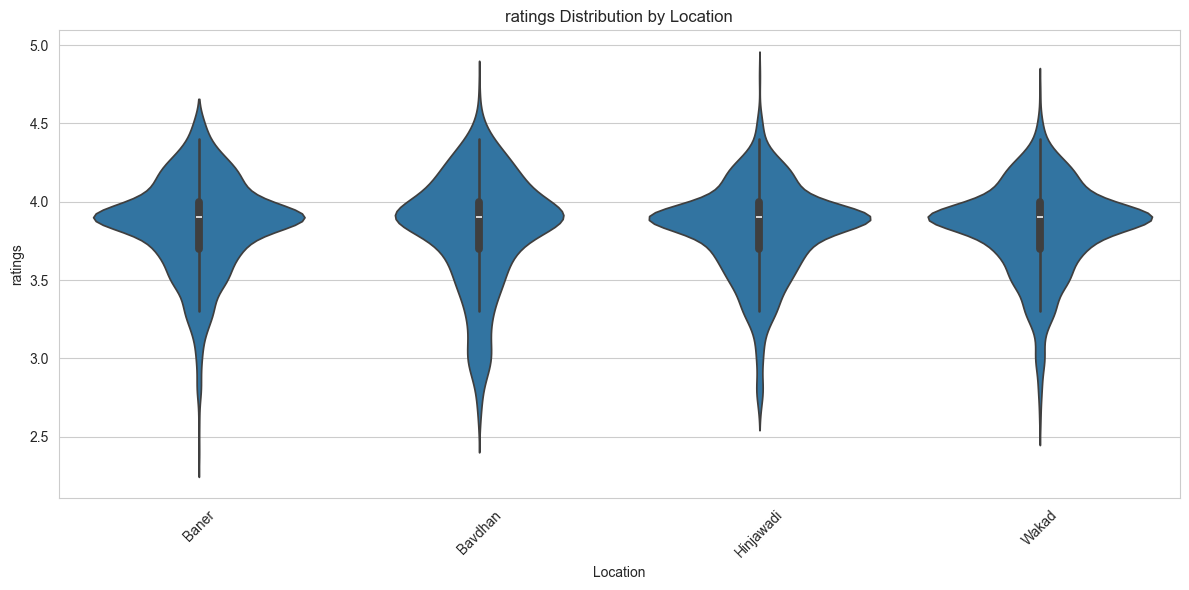

In [19]:
if len(numeric_cols) > 0:
    for col in numeric_cols[:2]:
        plt.figure(figsize=(12, 6))
        sns.violinplot(x='location', y=col, data=combined)
        plt.title(f'{col} Distribution by Location')
        plt.xlabel('Location')
        plt.ylabel(col)
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

In [20]:
categorical_cols = combined.select_dtypes(include=['object']).columns.tolist()
if 'location' in categorical_cols:
    categorical_cols.remove('location')
print(f"Categorical columns: {categorical_cols}")

Categorical columns: ['Name', 'off', 'price_for_one', 'delivery_reviews', 'cuisine']


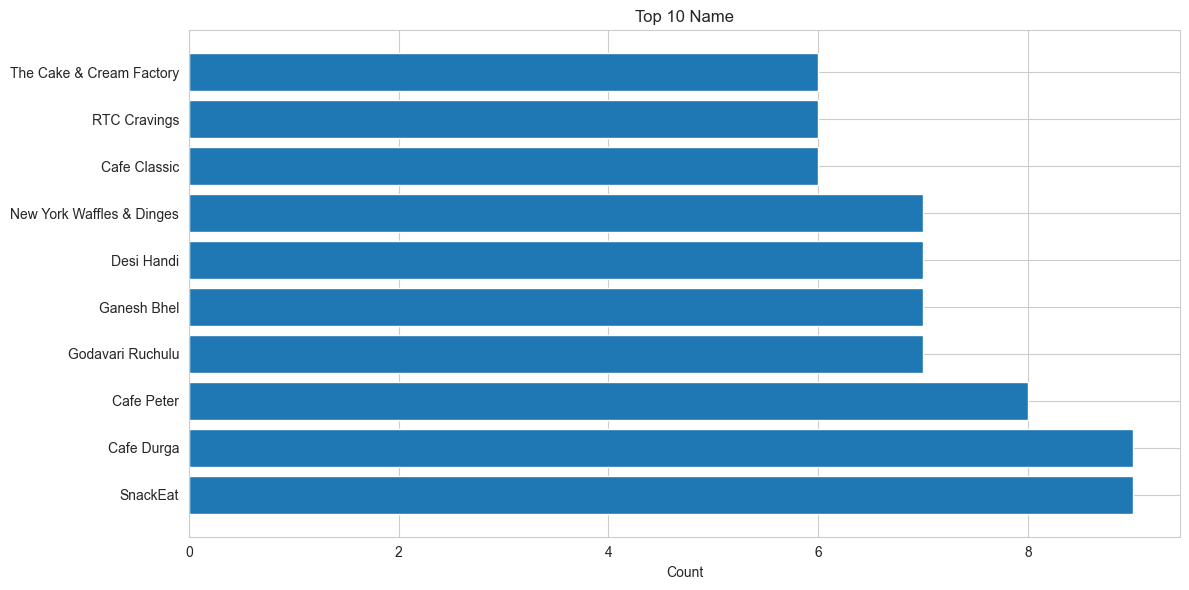

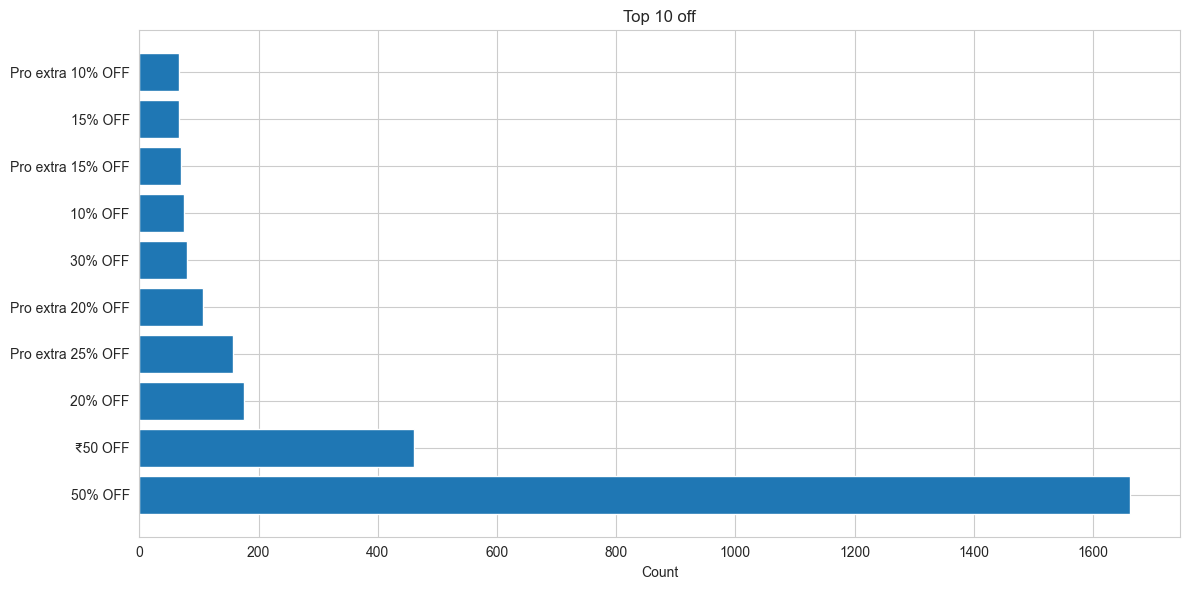

In [21]:
if len(categorical_cols) > 0:
    for col in categorical_cols[:2]:
        plt.figure(figsize=(12, 6))
        top_values = combined[col].value_counts().head(10)
        plt.barh(range(len(top_values)), top_values.values)
        plt.yticks(range(len(top_values)), top_values.index)
        plt.xlabel('Count')
        plt.title(f'Top 10 {col}')
        plt.tight_layout()
        plt.show()

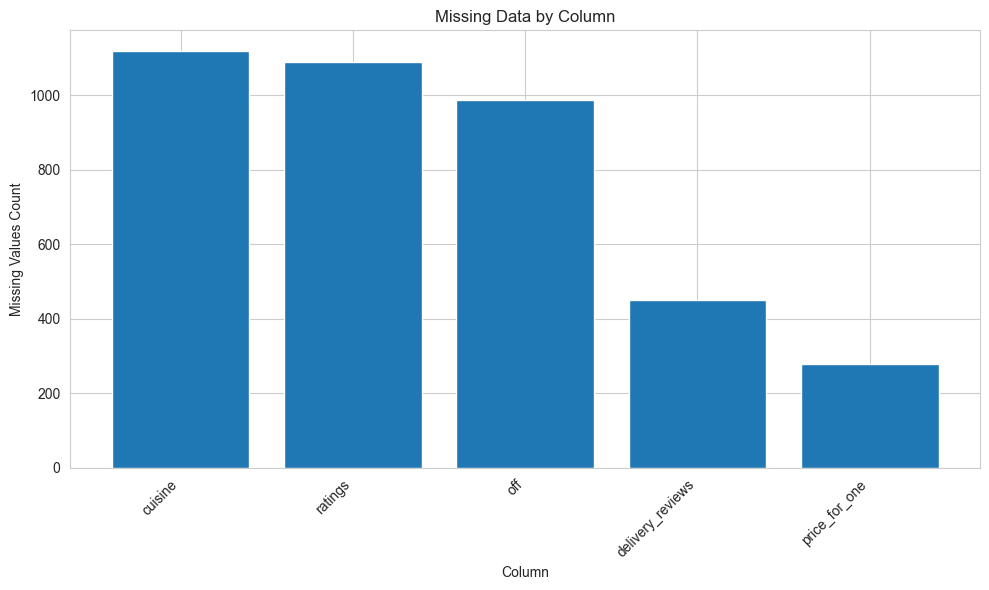

In [22]:
missing_data = combined.isnull().sum()
if missing_data.sum() > 0:
    missing_data = missing_data[missing_data > 0].sort_values(ascending=False)
    plt.figure(figsize=(10, 6))
    plt.bar(range(len(missing_data)), missing_data.values)
    plt.xticks(range(len(missing_data)), missing_data.index, rotation=45, ha='right')
    plt.xlabel('Column')
    plt.ylabel('Missing Values Count')
    plt.title('Missing Data by Column')
    plt.tight_layout()
    plt.show()
else:
    print('No missing data')

In [23]:
summary_stats = combined.groupby('location')[numeric_cols].agg(['mean', 'median', 'std', 'min', 'max'])
summary_stats

ratings                           
               mean median       std  min  max
location                                      
Baner      3.848649    3.9  0.303055  2.4  4.5
Bavdhan    3.816694    3.9  0.361989  2.6  4.7
Hinjawadi  3.809577    3.9  0.295034  2.7  4.8
Wakad      3.828425    3.9  0.291567  2.6  4.7

In [24]:
if len(numeric_cols) >= 3:
    selected_cols = numeric_cols[:3]
    pd.plotting.scatter_matrix(combined[selected_cols], figsize=(12, 12), 
                               diagonal='hist', alpha=0.5)
    plt.suptitle('Scatter Matrix', y=1.0)
    plt.tight_layout()
    plt.show()

In [25]:
print(f"Total records analyzed: {len(combined)}")
print(f"Number of locations: {combined['location'].nunique()}")
print(f"Number of features: {len(combined.columns)}")

Total records analyzed: 4049
Number of locations: 4
Number of features: 7
